In [2]:
pip install pydotplus

     |████████████████████████████████| 278 kB 5.0 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=596ecb2edd9e5f016070d81eed08b254a576adc2d46049deae3f9e99fd8f23fe
  Stored in directory: /home/jupyter/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


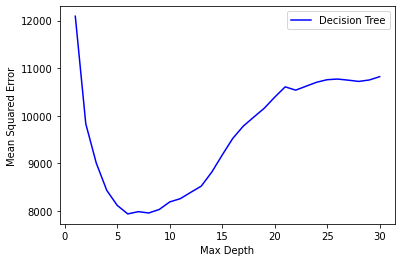

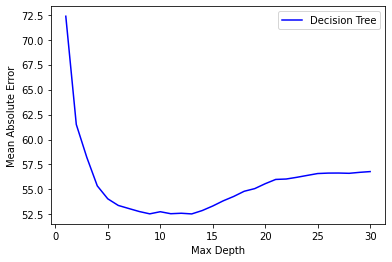

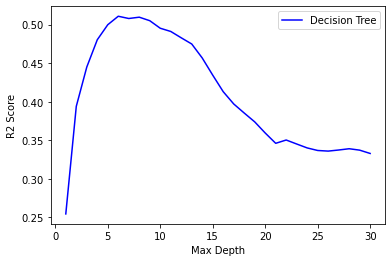

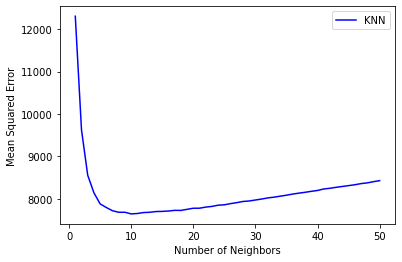

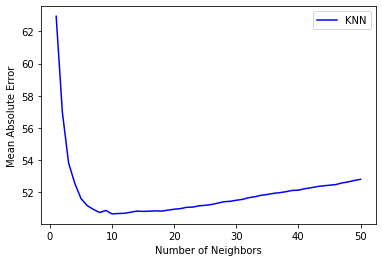

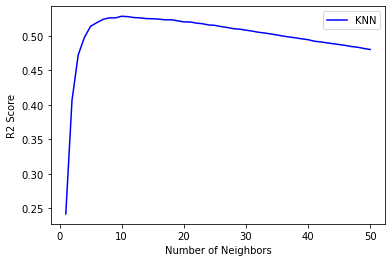

In [3]:
import sys
import csv

import matplotlib.pyplot as plt

import pydotplus

from sklearn import linear_model, tree
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.externals.six import StringIO
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Build X and Y lists
# X : Features
# Y : Target
X = []
Y = []


with open('full_table.csv', 'r') as file:
    for line in csv.reader(file, delimiter = ','):
        if len(line) == 10:
            try:
                average_rent = float(line[2])
                property_type = line[3]
                room_type = line[4]
                accommodates = int(line[5])
                bathrooms = float(line[6])
                beds = int(line[7])
                bed_type = line[8]
                price = float(line[9])

                x = {
                    'average_rent': average_rent,
                    'property_type': property_type,
                    'room_type': room_type,
                    'accommodates': accommodates,
                    'bathrooms': bathrooms,
                    'beds': beds,
                    'bed_type': bed_type
                }

                y = price

                X.append(x)
                Y.append(y)


            except:
                pass


# The DictVectorizer converts data from a dictionary to an array
vectorizer = DictVectorizer()

# Convert X to Array
X = vectorizer.fit_transform(X).toarray()

# Store Vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

# Split X and Y into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

# Normalizer that will normalize the data
normalizer = Normalizer().fit(X)

# Normalized Features:
X_norm = normalizer.transform(X)
#X_norm = preprocessing.normalize(X)

# Store Normalizer
joblib.dump(normalizer, 'normalizer.pkl')

# Split X and Y into training and testing sets for normalized data
X_norm_train, X_norm_test, Y_norm_train, Y_norm_test = train_test_split(X_norm, Y, test_size=0.33)


output = []


output.append('Model, Mean Squared Error, Mean Absolute Error, R2 Score')


# Linear Regression
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Add to result to output
output.append('Linear Regression,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'linear_regression.pkl')


# Gradient Descent
model = linear_model.SGDRegressor()
model.fit(X_norm_train, Y_norm_train)
Y_pred = model.predict(X_norm_test)
mse = mean_squared_error(Y_norm_test, Y_pred)
mae = mean_absolute_error(Y_norm_test, Y_pred)
r2 = r2_score(Y_norm_test, Y_pred)

# Add to result to output
output.append('Gradient Descent,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'gradient_descent.pkl')


# Support Vector Machine Regression
model = SVR()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

output.append('Support Vector Machines,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'svm.pkl')

# Naive Bayes Regression
model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Add to result to output
output.append('Naive Bayes,{0},{1},{2}'.format(mse, mae, r2))

# Store model
joblib.dump(model, 'naive_bayes.pkl')



# Decision Tree
mse_array = []
mae_array = []
r2_array = []
model_array = []

n_array = [ n + 1 for n in range(30)]

for n in n_array:
    model = DecisionTreeRegressor(max_depth=n)
    model.fit(X_train, Y_train)
    model_array.append(model)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mse_array.append(mse)
    mae = mean_absolute_error(Y_test, Y_pred)
    mae_array.append(mae)
    r2 = r2_score(Y_test, Y_pred)
    r2_array.append(r2)


mse, index = min((mse, idx) for (idx, mse) in enumerate(mse_array))
mae = mae_array[index]
r2 = r2_array[index]

model = model_array[index]

# Store model
joblib.dump(model, 'decision_tree.pkl')

# Store representation of decision tree
dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree_visualized.png')


output.append('Decision Tree(max-depth = {0}),{1},{2},{3}'.format(index, mse, mae, r2))


plt.figure()
plt.plot(n_array, mse_array, 'b-', label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('decision_tree_mse.png')


plt.figure()
plt.plot(n_array, mae_array, 'b-', label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.savefig('decision_tree_mae.png')


plt.figure()
plt.plot(n_array, r2_array, 'b-', label='Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.savefig('decision_tree_r2.png')


# KNN
mse_array = []
mae_array = []
r2_array = []
model_array = []

n_array = [ n + 1 for n in range(50)]

for n in n_array:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, Y_train)
    model_array.append(model)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    mse_array.append(mse)
    mae = mean_absolute_error(Y_test, Y_pred)
    mae_array.append(mae)
    r2 = r2_score(Y_test, Y_pred)
    r2_array.append(r2)

mse, index = min((mse, idx) for (idx, mse) in enumerate(mse_array))
mae = mae_array[index]
r2 = r2_array[index]

model = model_array[index]
# Store model
joblib.dump(model, 'knn.pkl')

output.append('KNN(#neighbors = {0}),{1},{2},{3}'.format(index, mse, mae, r2))



with open('model_evaluation.csv', 'w') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerows([row.split(',') for row in output])



plt.figure()
plt.plot(n_array, mse_array, 'b-', label='KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.savefig('KNN_mse.png')


plt.figure()
plt.plot(n_array, mae_array, 'b-', label='KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.savefig('KNN_mae.png')


plt.figure()
plt.plot(n_array, r2_array, 'b-', label='KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('R2 Score')
plt.legend()
plt.savefig('KNN_r2.png')
